# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.218534e+01     1.590223e+01
 * time: 0.0044901371002197266
     1     6.206356e+01     9.098474e+00
 * time: 0.01262807846069336
     2     5.580875e+01     1.079934e+01
 * time: 0.031141996383666992
     3     3.934799e+01     7.756249e+00
 * time: 0.05594801902770996
     4     2.771654e+01     6.635509e+00
 * time: 0.08057594299316406
     5     1.802883e+01     4.219125e+00
 * time: 0.1835949420928955
     6     1.172540e+01     2.871833e+00
 * time: 0.20191693305969238
     7     9.626741e+00     3.337013e+00
 * time: 0.21988797187805176
     8     7.698619e+00     1.664872e+00
 * time: 0.24131011962890625
     9     7.518453e+00     3.745690e+00
 * time: 0.2560710906982422
    10     7.178798e+00     2.004192e+00
 * time: 0.2707231044769287
    11     6.740074e+00     2.317481e+00
 * time: 0.28531813621520996
    12     6.611013e+00     2.581139e+00
 * time: 0.29979705810546875
    13     6.336231e+00     3.211643e+00
 * time:

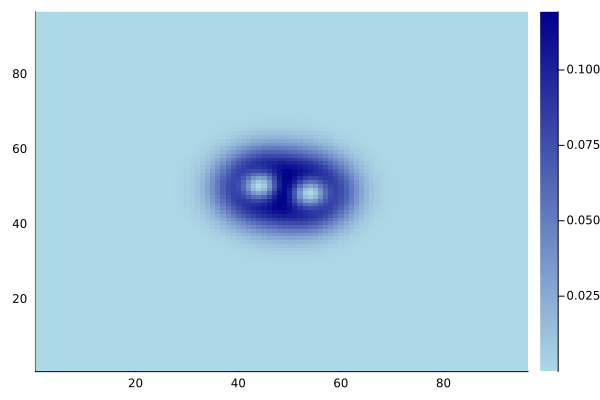

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)